# Visualizing COVID-19 Data

- This notebook uses a dataset from https://covid19.healthdata.org/
- The specific download link is https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip

Citation: Institute for Health Metrics and Evaluation (IHME). United States COVID-19 Hospital Needs and Death Projections. Seattle, United States of America: Institute for Health Metrics and Evaluation (IHME),
University of Washington, 2020.

#### First, the imports, we're adding pandas this time.


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

Importing a csv is a one line operation with pandas.  Note that a parameter was added to parse the dates.  We could have done this after the fact with `df['date_reported'] = pd.to_datetime(df['date_reported'])`

In [95]:
df = pd.read_csv('hospitalization_all_locs_corrected.csv', parse_dates=['date_reported'])

We can explore the data a bit by seeing the colums and look at the locations.

In [96]:
df.columns

Index(['location_name', 'date_reported', 'allbed_mean', 'allbed_lower',
       'allbed_upper', 'ICUbed_mean', 'ICUbed_lower', 'ICUbed_upper',
       'InvVen_mean', 'InvVen_lower', 'InvVen_upper', 'deaths_mean',
       'deaths_lower', 'deaths_upper', 'admis_mean', 'admis_lower',
       'admis_upper', 'newICU_mean', 'newICU_lower', 'newICU_upper',
       'totdea_mean', 'totdea_lower', 'totdea_upper', 'bedover_mean',
       'bedover_lower', 'bedover_upper', 'icuover_mean', 'icuover_lower',
       'icuover_upper'],
      dtype='object')

In [97]:
set(df.location_name)

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'King and Snohomish Counties (excluding Life Care Center), WA',
 'Life Care Center, Kirkland, WA',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Other Counties, WA',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'United States of America',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [98]:
df['date_reported']

0      2020-02-06
1      2020-02-07
2      2020-02-08
3      2020-02-09
4      2020-02-10
          ...    
9950   2020-07-31
9951   2020-08-01
9952   2020-08-02
9953   2020-08-03
9954   2020-08-04
Name: date_reported, Length: 9955, dtype: datetime64[ns]

Note that the `dtype` is `datetime64` due to the date parsing.  This will make our plots look nicer later, but adds some complication.

#### Aggregation

Pandas can very simply extract subsets of the data and aggregrate them.  Here, we obtain some columns and sum up the counts by date.

In [88]:
grouped = df[['totdea_mean','totdea_upper','totdea_lower']].groupby(df['date_reported']).sum()

Now to plot this.  To narrow the date range down, we define a figure rather than the usual shortcut, and set limits on the x axis.  Since the index is in datetime, we

(737485.0, 737638.0)

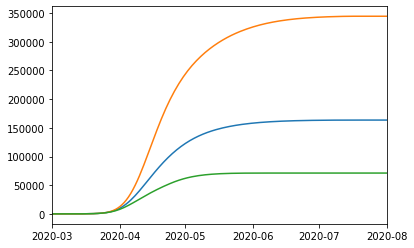

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(grouped.index,grouped['totdea_mean'])
ax.plot(grouped.index,grouped['totdea_upper'])
ax.plot(grouped.index,grouped['totdea_lower'])
ax.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 8, 1)])

(18322, 18475)

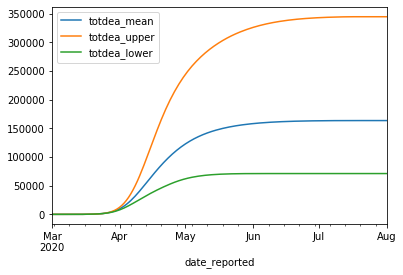

In [93]:
ax = grouped.plot()
ax.set_xlim(['3/1/2020', '8/1/2020'])

In [92]:
ax.set_xlim(['3/1/2020', '8/1/2020'])

(18322, 18475)